In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка и выявление структуры данных

In [88]:
df = pd.read_csv('data_koby.csv')
submisiion = pd.read_csv('sample_submission_koby.csv')

In [89]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

In [91]:
for col in df.columns:
    print('Количество незаполненных ячеек в столбце {0}:{1}'.format(col, np.sum(df[col].isnull())))

Количество незаполненных ячеек в столбце action_type:0
Количество незаполненных ячеек в столбце combined_shot_type:0
Количество незаполненных ячеек в столбце game_event_id:0
Количество незаполненных ячеек в столбце game_id:0
Количество незаполненных ячеек в столбце lat:0
Количество незаполненных ячеек в столбце loc_x:0
Количество незаполненных ячеек в столбце loc_y:0
Количество незаполненных ячеек в столбце lon:0
Количество незаполненных ячеек в столбце minutes_remaining:0
Количество незаполненных ячеек в столбце period:0
Количество незаполненных ячеек в столбце playoffs:0
Количество незаполненных ячеек в столбце season:0
Количество незаполненных ячеек в столбце seconds_remaining:0
Количество незаполненных ячеек в столбце shot_distance:0
Количество незаполненных ячеек в столбце shot_made_flag:5000
Количество незаполненных ячеек в столбце shot_type:0
Количество незаполненных ячеек в столбце shot_zone_area:0
Количество незаполненных ячеек в столбце shot_zone_basic:0
Количество незаполнен

In [92]:
df.shape

(30697, 25)

## Генерация доп признаков

In [93]:
# преобразуем данные в столбце 'game_date' to datetime

df['game_date'] = df['game_date'].apply(pd.to_datetime)

In [94]:
# разобъем их по дню, месяцу и году

df['day'] = df['game_date'].map(lambda x: x.date()).apply(str)
df['year'] = df['game_date'].map(lambda x: x.year)
df['month'] = df['game_date'].map(lambda x: x.month)

In [95]:
# имеем три дополнительных признака

df.shape

(30697, 28)

In [96]:
# удалим признаки, которые вероятно не оказывают влияние на значение 'shot_made_flag'

df = df.drop('day', axis=1)
df = df.drop('team_id', axis=1)
df = df.drop('team_name', axis=1)
df = df.drop('game_date', axis=1)

In [97]:
df.shape

(30697, 24)

** Преобразуем категориальные признаки в числовые, используя метод LabelEncoder**

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() 

encoder.fit(df['action_type']) 
df['action_type'] = encoder.transform(df['action_type'])

encoder.fit(df['combined_shot_type']) 
df['combined_shot_type'] = encoder.transform(df['combined_shot_type'])

encoder.fit(df['shot_type']) 
df['shot_type'] = encoder.transform(df['shot_type'])

encoder.fit(df['shot_zone_area']) 
df['shot_zone_area'] = encoder.transform(df['shot_zone_area'])

encoder.fit(df['shot_zone_basic']) 
df['shot_zone_basic'] = encoder.transform(df['shot_zone_basic'])

encoder.fit(df['shot_zone_range']) 
df['shot_zone_range'] = encoder.transform(df['shot_zone_range'])

encoder.fit(df['matchup']) 
df['matchup'] = encoder.transform(df['matchup'])

encoder.fit(df['opponent']) 
df['opponent'] = encoder.transform(df['opponent'])

encoder.fit(df['season']) 
df['season'] = encoder.transform(df['season'])

In [99]:
# все категорильные признаки стали числовыми

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 24 columns):
action_type           30697 non-null int64
combined_shot_type    30697 non-null int64
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null int64
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null int64
shot_zone_area        30697 non-null int64
shot_zone_basic       30697 non-null int64
shot_zone_range       30697 non-null int64
matchup               30697 non-null int64
opponent              306

## Разобьем выборку на обучение и тест

In [100]:
test = df[df['shot_made_flag'].isnull()]
train = df[~df['shot_made_flag'].isnull()]

In [101]:
print('Test size:', test.shape, 'Train size:', train.shape)

Test size: (5000, 24) Train size: (25697, 24)


**Обучение и отложенный тест только на обучающей выборке**

Делаем данную разбивку для того, чтобы сначала проверять точность работы алгоритма на отложенной выборке

In [102]:
train_data = train.iloc[:-5000, :]
hold_out_test_data = train.iloc[-5000:, :]

In [103]:
print ('Исходная выборка:', train.shape, 
       'Отложенная обучающая выборка:', train_data.shape, 
       'Отложенная тестоая выборка', hold_out_test_data.shape)

Исходная выборка: (25697, 24) Отложенная обучающая выборка: (20697, 24) Отложенная тестоая выборка (5000, 24)


**Данные и целевая функция**

In [104]:
#обучение
train_labels = train_data['shot_made_flag'].values
train_data = train_data.drop(['shot_made_flag'], axis = 1)

In [105]:
#тест
test_labels = hold_out_test_data['shot_made_flag'].values
test_data = hold_out_test_data.drop(['shot_made_flag'], axis = 1)

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,'test data')

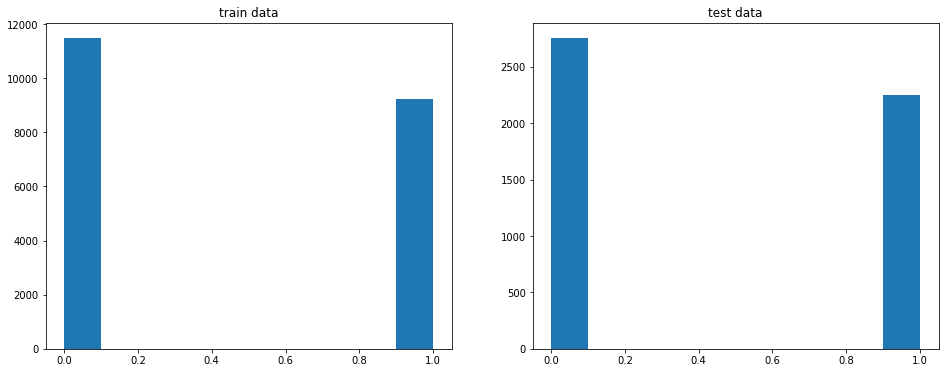

In [106]:
# посмотрим на сбалансированность обучающей и тестовой выборок

%pylab inline
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_labels)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_labels)
pylab.title('test data')

**Scaling**

Стандартизировать функции, удалив среднее значение и масштабирование до единицы дисперсии

Центрирование и масштабирование происходят независимо от каждой функции, вычисляя соответствующую статистику по образцам в обучающем наборе. Среднее и стандартное отклонение затем сохраняются для использования в последующих данных с использованием метода преобразования.

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [109]:
scaled_train_data.shape
scaled_test_data.shape

(5000, 23)

**Посмотрим на важность признаков, используя метод SelectKBest**

In [110]:
predictors = ['combined_shot_type','game_event_id',
              'lat', 'loc_x', 'loc_y', 'minutes_remaining', 'period',
              'season', 'seconds_remaining', 'shot_distance',
              'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
              'matchup', 'opponent','shot_id', 'year']

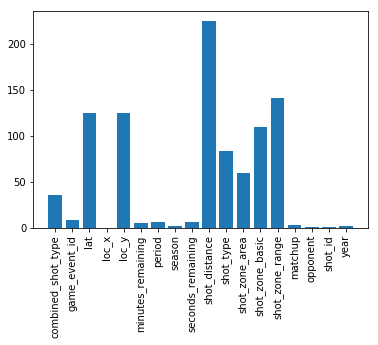

In [111]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selector.fit(train[predictors], train["shot_made_flag"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

Видим основной вклад признаков в целевое значение y.

## Построение моделей

### decision tree

In [112]:
from sklearn.tree import DecisionTreeClassifier
alg_dec_tr = DecisionTreeClassifier(random_state = 0)

In [113]:
alg_dec_tr.fit(scaled_train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [114]:
predictions = alg_dec_tr.predict(scaled_test_data)

**Оценка качества работы алгоритма**

In [115]:
probability_predictions = alg_dec_tr.predict_proba(scaled_test_data)

In [116]:
print (probability_predictions)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### accuracy

In [117]:
from sklearn import cross_validation, datasets, linear_model, metrics 
metrics.accuracy_score(test_labels, predictions)

0.5558

#### classification report

In [118]:
print (metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

        0.0       0.61      0.54      0.57      2754
        1.0       0.50      0.57      0.54      2246

avg / total       0.56      0.56      0.56      5000



#### log loss

In [119]:
metrics.log_loss(test_labels, probability_predictions[:,1])

15.342325653332763

#### ROC curve

In [120]:
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

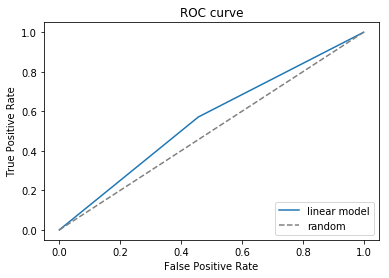

In [121]:
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [122]:
metrics.roc_auc_score(test_labels, predictions)

0.5572238162769477

### Random forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1, n_estimators=500, min_samples_split=30, min_samples_leaf=10)


In [124]:
forest.fit(scaled_train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [125]:
predictions = forest.predict(scaled_test_data)

In [126]:
probability_predictions = forest.predict_proba(scaled_test_data)

In [127]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

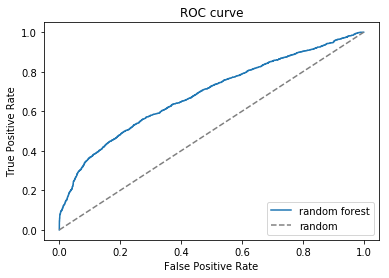

In [128]:
pylab.plot(fpr, tpr, label = 'random forest')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [129]:
# log-loss
metrics.log_loss(test_labels, probability_predictions[:,1])

0.6211824030508621

In [130]:
from sklearn import cross_validation, datasets, linear_model, metrics 
metrics.accuracy_score(test_labels, predictions)

0.6588

In [131]:
print (metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

        0.0       0.65      0.83      0.73      2754
        1.0       0.68      0.45      0.54      2246

avg / total       0.66      0.66      0.64      5000



In [132]:
metrics.roc_auc_score(test_labels, predictions)

0.6395548028254538

## gradient boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

GBM = GradientBoostingClassifier(random_state=1)

In [134]:
GBM.fit(scaled_train_data, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [135]:
predictions = GBM.predict(scaled_test_data)

In [136]:
probability_predictions = GBM.predict_proba(scaled_test_data)

In [137]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

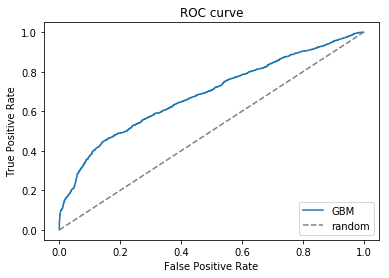

In [138]:
pylab.plot(fpr, tpr, label = 'GBM')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [139]:
print (metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

        0.0       0.66      0.77      0.71      2754
        1.0       0.65      0.51      0.57      2246

avg / total       0.65      0.65      0.65      5000



In [140]:
# доля правильных ответов
gbm_1_accuracy = metrics.accuracy_score(test_labels, predictions)
print('gbm_1_acciracy: ', gbm_1_accuracy)

# log-loss без подбора параметров алгоритма
gbm_1_log_loss = metrics.log_loss(test_labels, probability_predictions[:,1])
print('log-loss GBM1: ',gbm_1_log_loss)

gbm1_roc_auc = metrics.roc_auc_score(test_labels, predictions)
print('AUC-ROC GBM1: ', gbm1_roc_auc)

gbm_1_acciracy:  0.6544
log-loss GBM1:  0.6245604175703687
AUC-ROC GBM1:  0.6411863647210145


## Подбор параметров при помощи GridSearch

In [141]:
from sklearn.cross_validation import StratifiedKFold
cv = StratifiedKFold(train_labels, n_folds=10, shuffle=True, random_state=1)

In [150]:
from sklearn.grid_search import GridSearchCV

gbm_model = GradientBoostingClassifier()
gbm_params = [{
    "max_features": [5, 10, 15],
    'max_depth': [1, 3, 5],
    'max_leaf_nodes': [5, 6, 7],
    'n_estimators': [50, 70, 90],
    'min_samples_split': [5, 6, 7],
    'subsample': [0.5, 1]
}]
gbm_model = GridSearchCV(gbm_model, gbm_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
gbm_model.fit(scaled_train_data, train_labels)
gbm_model_best = gbm_model.best_estimator_
print("Accuracy (gradient boosting): {} with params {}"
      .format(gbm_model.best_score_, gbm_model.best_params_))

Fitting 10 folds for each of 486 candidates, totalling 4860 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 4860 out of 4860 | elapsed: 21.5min finished


Accuracy (gradient boosting): 0.6829009035125864 with params {'max_depth': 3, 'max_features': 10, 'max_leaf_nodes': 7, 'min_samples_split': 7, 'n_estimators': 70, 'subsample': 0.5}


**Построим алгоритм с подобранными параметрами**

In [142]:
gbm_best = GradientBoostingClassifier(random_state=1, max_depth=3, max_features=10, max_leaf_nodes=7, 
                                      min_samples_split=7, n_estimators=70, subsample=0.5)

In [143]:
gbm_best.fit(scaled_train_data, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=7, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=7, min_weight_fraction_leaf=0.0,
              n_estimators=70, presort='auto', random_state=1,
              subsample=0.5, verbose=0, warm_start=False)

In [144]:
predictions = gbm_best.predict(scaled_test_data)

In [145]:
probability_predictions = gbm_best.predict_proba(scaled_test_data)

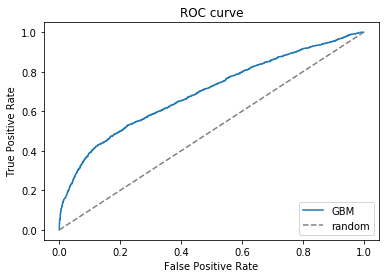

In [146]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

pylab.plot(fpr, tpr, label = 'GBM')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [147]:
print (metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

        0.0       0.66      0.82      0.73      2754
        1.0       0.69      0.48      0.56      2246

avg / total       0.67      0.67      0.66      5000



In [148]:
# доля правильных ответов
metrics.accuracy_score(test_labels, predictions)

0.6678

In [149]:
# доля правильных ответов
gbm_best_accuracy = metrics.accuracy_score(test_labels, predictions)

# log-loss без подбора параметров алгоритма
gbm_best_log_loss = metrics.log_loss(test_labels, probability_predictions[:,1])


# AUC-ROC
gbm_best_roc_auc = metrics.roc_auc_score(test_labels, predictions)


In [150]:
print('**Оценка качества модели до подбора параметров алгоритма**')
print('accuracy GBM1: ', gbm_1_accuracy)
print('log-loss GBM1: ',gbm_1_log_loss)
print('AUC-ROC GBM1: ', gbm1_roc_auc)
print('===================================')
print('**Оценка качества модели после подбора параметров алгоритма**')
print('gbm_best_acсuracy: ', gbm_best_accuracy)
print('log-loss gbm_best: ',gbm_best_log_loss)
print('AUC-ROC gbm_best: ', gbm_best_roc_auc)

**Оценка качества модели до подбора параметров алгоритма**
accuracy GBM1:  0.6544
log-loss GBM1:  0.6245604175703687
AUC-ROC GBM1:  0.6411863647210145
**Оценка качества модели после подбора параметров алгоритма**
gbm_best_acсuracy:  0.6678
log-loss gbm_best:  0.6150451233294226
AUC-ROC gbm_best:  0.6502296344150272


**Еще немного настройки параметров**

In [151]:
from sklearn.grid_search import GridSearchCV

gbm_model = GradientBoostingClassifier(random_state=1, max_depth=3, max_features=10, max_leaf_nodes=7, 
                                      min_samples_split=7, n_estimators=70, subsample=0.5)
gbm_params = [{
   'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    
}]
gbm_model = GridSearchCV(gbm_model, gbm_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
gbm_model.fit(scaled_train_data, train_labels)
gbm_model_best = gbm_model.best_estimator_
print("Accuracy (gradient boosting): {} with params {}"
      .format(gbm_model.best_score_, gbm_model.best_params_))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.2s finished


Accuracy (gradient boosting): 0.6830941682369426 with params {'random_state': 3}


In [152]:
from sklearn.grid_search import GridSearchCV

gbm_model = GradientBoostingClassifier(random_state=3, max_depth=3, max_features=10, max_leaf_nodes=12, 
                                      min_samples_split=12, n_estimators=70, subsample=0.5)
gbm_params = [{
   'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    
   
}]
gbm_model = GridSearchCV(gbm_model, gbm_params, cv=cv, refit=True, verbose=1, n_jobs=-1)
gbm_model.fit(scaled_train_data, train_labels)
gbm_model_best = gbm_model.best_estimator_
print("Accuracy (gradient boosting): {} with params {}"
      .format(gbm_model.best_score_, gbm_model.best_params_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   12.1s finished


Accuracy (gradient boosting): 0.6835290138667439 with params {'min_weight_fraction_leaf': 0}


### Алгоритм с уточненными параметрами

In [153]:
gbm_best2 = GradientBoostingClassifier(min_weight_fraction_leaf=0, random_state=3, max_depth=3, max_features=10, max_leaf_nodes=12, 
                                      min_samples_split=12, n_estimators=70, subsample=0.5)

In [154]:
gbm_best2.fit(scaled_train_data, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=12,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=12,
              min_weight_fraction_leaf=0, n_estimators=70, presort='auto',
              random_state=3, subsample=0.5, verbose=0, warm_start=False)

In [155]:
predictions = gbm_best2.predict(scaled_test_data)

In [156]:
probability_predictions = gbm_best.predict_proba(scaled_test_data)

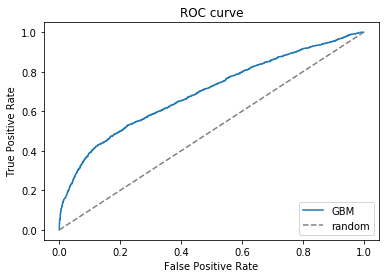

In [157]:
# ROC curve
fpr, tpr, _ = metrics.roc_curve(test_labels, probability_predictions[:,1])

pylab.plot(fpr, tpr, label = 'GBM')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

In [158]:
print (metrics.classification_report(test_labels, predictions))

             precision    recall  f1-score   support

        0.0       0.66      0.79      0.72      2754
        1.0       0.66      0.51      0.57      2246

avg / total       0.66      0.66      0.65      5000



In [159]:
# доля правильных ответов
gbm_best2_accuracy = metrics.accuracy_score(test_labels, predictions)

# log-loss без подбора параметров алгоритма
gbm_best2_log_loss = metrics.log_loss(test_labels, probability_predictions[:,1])

# AUC-ROC
gbm_best2_roc_auc = metrics.roc_auc_score(test_labels, predictions)

In [160]:
print('**Оценка качества модели до подбора параметров алгоритма**')
print('accuracy GBM1: ', gbm_1_accuracy)
print('log-loss GBM1: ',gbm_1_log_loss)
print('AUC-ROC GBM1: ', gbm1_roc_auc)
print('===================================')
print('**Оценка качества модели после подбора параметров алгоритма**')
print('gbm_best_acсuracy: ', gbm_best_accuracy)
print('log-loss gbm_best: ',gbm_best_log_loss)
print('AUC-ROC gbm_best: ', gbm_best_roc_auc)
print('**Оценка качества модели после второго подбора параметров алгоритма**')
print('gbm_best_acсuracy: ', gbm_best2_accuracy)
print('log-loss gbm_best: ',gbm_best2_log_loss)
print('AUC-ROC gbm_best: ', gbm_best2_roc_auc)

**Оценка качества модели до подбора параметров алгоритма**
accuracy GBM1:  0.6544
log-loss GBM1:  0.6245604175703687
AUC-ROC GBM1:  0.6411863647210145
**Оценка качества модели после подбора параметров алгоритма**
gbm_best_acсuracy:  0.6678
log-loss gbm_best:  0.6150451233294226
AUC-ROC gbm_best:  0.6502296344150272
**Оценка качества модели после второго подбора параметров алгоритма**
gbm_best_acсuracy:  0.6618
log-loss gbm_best:  0.6150451233294226
AUC-ROC gbm_best:  0.647370036039217


## Проверка на тестовой выборке

In [161]:
#обучение
train_labels = train['shot_made_flag'].values
train_data = train.drop(['shot_made_flag'], axis = 1)

In [162]:
#тест
test = df[df['shot_made_flag'].isnull()]
test_labels = test['shot_made_flag'].values
test_data = test.drop(['shot_made_flag'], axis = 1)

In [163]:
print('Test size:', train_labels.shape, 'Train size:', train_data.shape)
print('Test size:', test_labels.shape, 'Train size:', test_data.shape)

Test size: (25697,) Train size: (25697, 23)
Test size: (5000,) Train size: (5000, 23)


**Проведем масштабирование**

In [164]:
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [165]:
GBM = GradientBoostingClassifier(random_state=3, max_depth=3, max_features=10, max_leaf_nodes=12, 
                                      min_samples_split=12, n_estimators=70, subsample=0.5)

In [166]:
GBM.fit(scaled_train_data, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=12,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=12,
              min_weight_fraction_leaf=0.0, n_estimators=70,
              presort='auto', random_state=3, subsample=0.5, verbose=0,
              warm_start=False)

In [167]:
predictions = GBM.predict(scaled_test_data)
predictions.shape

(5000,)

#### Вывод результата в файл

In [168]:
submission = pd.DataFrame({
    "shot_id": test["shot_id"],
    "shot_made_flag": predictions
})

submission.to_csv("kobe_submission.csv", index=False)

In [169]:
submission.head()

,shot_id,shot_made_flag
0,1,0.0
7,8,0.0
16,17,1.0
19,20,1.0
32,33,0.0
